## Part 1: EDA

_Insert cells as needed below to write a short EDA/data section that summarizes the data for someone who has never opened it before._ 
- Answer essential questions about the dataset (observation units, time period, sample size, many of the questions above) 
- Note any issues you have with the data (variable X has problem Y that needs to get addressed before using it in regressions or a prediction model because Z)
- Present any visual results you think are interesting or important

### Dataset Overview
- Observation Unit: Each row represents a single residential property sale
- Sample Size: 1,941 property records
- Time Period: Sales occurred from 2006 to 2008
-Target Variable: v_SalePrice, a continuous variable representing the sale price of the property
- Columns: 81 features including physical attributes of the property, neighborhood, condition, and sale details.

### SalesPrice
- v_SalePrice ranges from 13,100 to 755,000 with a median of around 161,900

### Missing Values
- 27 features contain missing values.
- Major missing data issues:
- v_Pool_QC (1,928 missing)
- v_Misc_Feature, v_Alley, v_Fence: mostly missing

### Variable Types
- Numerical (Continuous/Discrete): v_SalePrice, v_Lot_Area, v_Gr_Liv_Area, v_Total_Bsmt_SF, v_Bedroom_AbvGr, etc.
- Categorical (Nominal): v_Neighborhood, v_House_Style, v_Sale_Condition, etc.
- Categorical (Ordinal): v_Overall_Qual, v_Exter_Qual, v_Kitchen_Qual, v_Heating_QC, etc.

Summary Statistics:        v_MS_SubClass  v_Lot_Frontage     v_Lot_Area  v_Overall_Qual  \
count    1941.000000     1620.000000    1941.000000     1941.000000   
mean       58.088614       69.301235   10284.770222        6.113344   
std        42.946015       23.978101    7832.295527        1.401594   
min        20.000000       21.000000    1470.000000        1.000000   
25%        20.000000       58.000000    7420.000000        5.000000   
50%        50.000000       68.000000    9450.000000        6.000000   
75%        70.000000       80.000000   11631.000000        7.000000   
max       190.000000      313.000000  164660.000000       10.000000   

       v_Overall_Cond  v_Year_Built  v_Year_Remod/Add  v_Mas_Vnr_Area  \
count     1941.000000   1941.000000       1941.000000     1923.000000   
mean         5.568264   1971.321999       1984.073158      104.846074   
std          1.087465     30.209933         20.837338      184.982611   
min          1.000000   1872.000000       1950.0

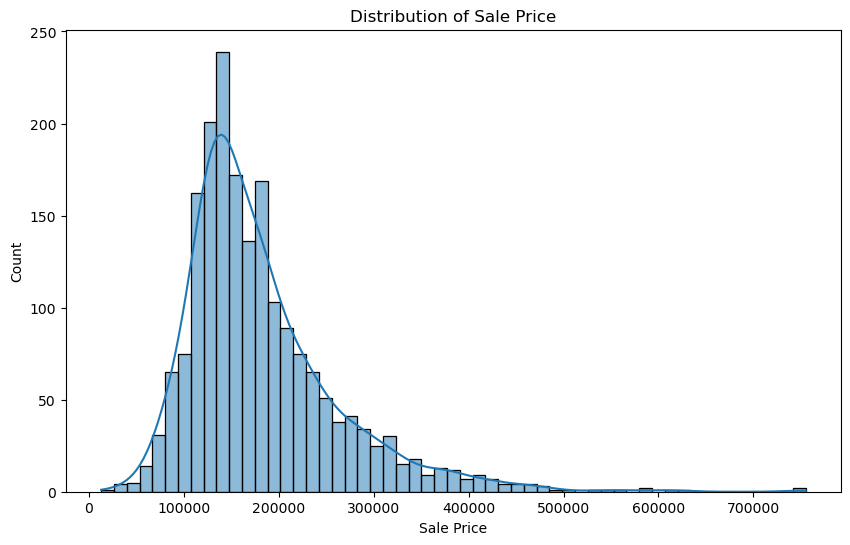

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

housing_train = df = pd.read_csv('input_data2/housing_train.csv')

print("Summary Statistics:", housing_train.describe())
print(housing_train.info())

print("Dataset Shape:", housing_train.shape)
print("Data Types:", housing_train.dtypes.value_counts())
print("First Rows:", housing_train.head())

missing = housing_train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing)


plt.figure(figsize=(10, 6))
sns.histplot(housing_train['v_SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.show()

## Part 2: Running Regressions

**Run these regressions on the RAW data, even if you found data issues that you think should be addressed.**

_Insert cells as needed below to run these regressions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

_Note: If you are using VS Code, these might not display correctly. Add a "\\" in front of the underscores in the variable names, so `\text{v_Lot_Area}` becomes `\text{v\_Lot\_Area}`._

1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * \text{v_Lot_Area}$
1. $\text{Sale Price}_{i,t} = \alpha + \beta_1 * log(\text{v_Lot_Area})$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Lot_Area}$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * log(\text{v_Lot_Area})$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * \text{v_Yr_Sold}$
1. $log(\text{Sale Price}_{i,t}) = \alpha + \beta_1 * (\text{v_Yr_Sold==2007})+ \beta_2 * (\text{v_Yr_Sold==2008})$
1. Choose your own adventure: Pick any five variables from the dataset that you think will generate good R2. Use them in a regression of $log(\text{Sale Price}_{i,t})$ 
    - Tip: You can transform/create these five variables however you want, even if it creates extra variables. For example: I'd count Model 6 above as only using one variable: `v_Yr_Sold`.
    - I got an R2 of 0.877 with just "5" variables. How close can you get? One student in five years has beat that. 
    

**Bonus formatting trick:** Instead of reporting all regressions separately, report all seven regressions in a _single_ table using `summary_col`.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

In [8]:
#1.
model = smf.ols('v_SalePrice ~ v_Lot_Area', data=housing_train)

results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            v_SalePrice   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     138.3
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           6.82e-31
Time:                        18:41:09   Log-Likelihood:                -24610.
No. Observations:                1941   AIC:                         4.922e+04
Df Residuals:                    1939   BIC:                         4.924e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.548e+05   2911.591     53.163      0.0

In [9]:
#2. 
housing_train['log_Lot_Area'] = np.log(housing_train['v_Lot_Area'])

model = smf.ols('v_SalePrice ~ log_Lot_Area', data=housing_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            v_SalePrice   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     285.6
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           6.95e-60
Time:                        18:41:09   Log-Likelihood:                -24544.
No. Observations:                1941   AIC:                         4.909e+04
Df Residuals:                    1939   BIC:                         4.910e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.279e+05   3.02e+04    -10.850   

In [10]:
#3. 

housing_train['log_SalePrice'] = np.log(housing_train['v_SalePrice'])

model = smf.ols('log_SalePrice ~ v_Lot_Area', data=housing_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     133.9
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           5.46e-30
Time:                        18:41:09   Log-Likelihood:                -927.19
No. Observations:                1941   AIC:                             1858.
Df Residuals:                    1939   BIC:                             1870.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8941      0.015    813.211      0.0

In [11]:
#4. 

housing_train['log_SalePrice'] = np.log(housing_train['v_SalePrice'])
housing_train['log_Lot_Area'] = np.log(housing_train['v_Lot_Area'])

model = smf.ols('log_SalePrice ~ log_Lot_Area', data=housing_train)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     302.5
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           4.38e-63
Time:                        18:41:09   Log-Likelihood:                -851.27
No. Observations:                1941   AIC:                             1707.
Df Residuals:                    1939   BIC:                             1718.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.4051      0.151     62.253   

In [12]:
#5.

housing_train['log_SalePrice'] = np.log(housing_train['v_SalePrice'])

model = smf.ols('log_SalePrice ~ v_Yr_Sold', data=housing_train)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2003
Date:                Sun, 30 Mar 2025   Prob (F-statistic):              0.655
Time:                        18:41:09   Log-Likelihood:                -991.88
No. Observations:                1941   AIC:                             1988.
Df Residuals:                    1939   BIC:                             1999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.2932     22.937      0.972      0.3

In [13]:
#6.

housing_train['log_SalePrice'] = np.log(housing_train['v_SalePrice'])

housing_train['v_Yr_Sold'] = housing_train['v_Yr_Sold'].astype('category')

model = smf.ols('log_SalePrice ~ C(v_Yr_Sold)', data=housing_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.394
Date:                Sun, 30 Mar 2025   Prob (F-statistic):              0.248
Time:                        18:41:09   Log-Likelihood:                -990.59
No. Observations:                1941   AIC:                             1987.
Df Residuals:                    1938   BIC:                             2004.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               12.0229 

In [14]:
#7.

housing_train['log_SalePrice'] = np.log(housing_train['v_SalePrice'])
housing_train['log_Gr_Liv_Area'] = np.log(housing_train['v_Gr_Liv_Area'])


model = smf.ols('log_SalePrice ~ v_Overall_Qual + log_Gr_Liv_Area + v_Total_Bsmt_SF + v_Garage_Cars + v_Pool_Area', data=housing_train)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          log_SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1683.
Date:                Sun, 30 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:41:09   Log-Likelihood:                 636.45
No. Observations:                1939   AIC:                            -1261.
Df Residuals:                    1933   BIC:                            -1227.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.2115      0.103     

## Part 3: Regression interpretation

_Insert cells as needed below to answer these questions. Note that $i$ is indexing a given house, and $t$ indexes the year of sale._ 

1. If you didn't use the `summary_col` trick, list $\beta_1$ for Models 1-6 to make it easier on your graders.
1. Interpret $\beta_1$ in Model 2. 
1. Interpret $\beta_1$ in Model 3. 
    - HINT: You might need to print out more decimal places. Show at least 2 non-zero digits. 
1. Of models 1-4, which do you think best explains the data and why?
1. Interpret $\beta_1$ In Model 5
1. Interpret $\alpha$ in Model 6
1. Interpret $\beta_1$ in Model 6
1. Why is the R2 of Model 6 higher than the R2 of Model 5?
1. What variables did you include in Model 7?
1. What is the R2 of your Model 7?
1. Speculate (not graded): Could you use the specification of Model 6 in a predictive regression? 
1. Speculate (not graded): Could you use the specification of Model 5 in a predictive regression? 


In [16]:
#1.
reg1= smf.ols('v_SalePrice ~ v_Lot_Area', data=housing_train).fit()
reg2= smf.ols('v_SalePrice ~ log_Lot_Area', data=housing_train).fit()
reg3= smf.ols('log_SalePrice ~ v_Lot_Area', data=housing_train).fit()
reg4= smf.ols('log_SalePrice ~ log_Lot_Area', data=housing_train).fit()
reg5= smf.ols('log_SalePrice ~ v_Yr_Sold', data=housing_train).fit()
reg6= smf.ols('log_SalePrice ~ C(v_Yr_Sold)', data=housing_train).fit()

print(summary_col(results=[reg1, reg2, reg3, reg4, reg5, reg6],
                  stars=True,
                  float_format='%0.4f',
                  model_names=['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Question 5', 'Question 6']))



                       Question 1      Question 2   Question 3 Question 4 Question 5 Question 6
-----------------------------------------------------------------------------------------------
Intercept            154789.5502*** -327915.8023*** 11.8941*** 9.4051***  12.0229*** 12.0229***
                     (2911.5906)    (30221.3471)    (0.0146)   (0.1511)   (0.0161)   (0.0161)  
v_Lot_Area           2.6489***                      0.0000***                                  
                     (0.2252)                       (0.0000)                                   
log_Lot_Area                        56028.1700***              0.2883***                       
                                    (3315.1392)                (0.0166)                        
v_Yr_Sold[T.2007]                                                         0.0256               
                                                                          (0.0222)             
v_Yr_Sold[T.2008]                      

2. A 1% increase in Lot_Area, increases SalesPrice by $560.28 (56028.17/100)

3. A 1 unit increase in Lot_Area, increases SalesPrice by 0.0013% (100*(exp(0.00001309)−1))

4. Model 4 (log_SalePrice ~ log_Lot_Area) best explains the data since it has the highest R^2 value of 0.1350

5. If v_Yr_Sold increases by 1 year, SalesPrice decreases by 0.509% (100*(exp(-0.0051)−1))

6. The average SalePrice in 2006 was $166,172 (exp(12.0229)

7. If v_Yr_sold increases by 1 year, SalesPrice increases by 2.59% (100*(exp(0.0256)−1))

8. R^2 of model 6 is higher than R^2 of model 5 because model 6 treats year as a categorical variable, allowing for nonlinear differences in sale price across years while Model 5 assumes a linear trend. This gives Model 6 more flexibility to fit the data.

9. The variables I included in model 7 were
   - v_Overall_Qual
   - v_Gr_Liv_Area (log)
   - v_Total_Bsmt_SF
   - v_Garage_Cars
   - v_Pool_Area

10. R^2 = 0.813

11. Probaly not since the model treats year as a dummy variable and not continous, won't work well for future years

12. Yes model 5 could be used for predictive regressions